In [434]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from torch import optim

In [450]:
time = torch.linspace(-1, 1, 1000)
time_series = torch.sin(time*10)

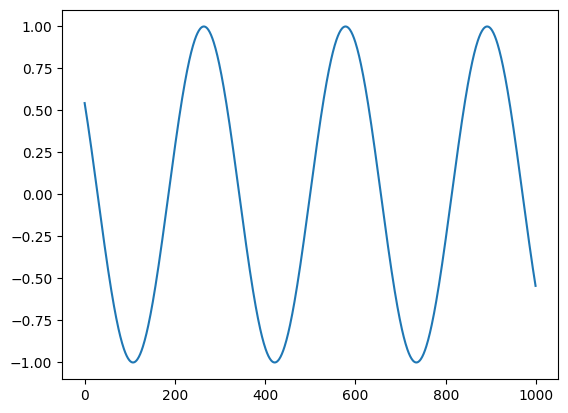

In [451]:
plt.plot(time_series)

In [17]:
import pandas as pd
# Available in the github repo : examples/data/BTC_USD-Hourly.csv
url = "https://raw.githubusercontent.com/ClementPerroud/Gym-Trading-Env/main/examples/data/BTC_USD-Hourly.csv"
df = pd.read_csv(url, parse_dates=["date"], index_col= "date")
df.sort_index(inplace= True)
df.dropna(inplace= True)
df.drop_duplicates(inplace=True)

In [18]:
import gymnasium as gym
import gym_trading_env

env = gym.make("TradingEnv",
        name= "BTCUSD",
        df = df, # Your dataset with your custom features
        positions = [ -1, 0, 1], # -1 (=SHORT), 0(=OUT), +1 (=LONG)
        trading_fees = 0.01/100, # 0.01% per stock buy / sell (Binance fees)
        borrow_interest_rate= 0.0003/100, # 0.0003% per timestep (one timestep = 1h here)
    )

In [19]:
# Run an episode until it ends :
done, truncated = False, False
observation, info = env.reset()
while not done and not truncated:
    # Pick a position by its index in your position list (=[-1, 0, 1])....usually something like : position_index = your_policy(observation)
    position_index = env.action_space.sample() # At every timestep, pick a random position index from your position list (=[-1, 0, 1])
    observation, reward, done, truncated, info = env.step(position_index)

Market Return : 395.51%   |   Portfolio Return : -99.45%   |   


In [20]:
import gymnasium as gym
from stable_baselines3 import PPO

# Parallel environments
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100_000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-----------------------------
| time/              |      |
|    fps             | 4595 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 3219       |
|    iterations           | 2          |
|    time_elapsed         | 1          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.01757867 |
|    clip_fraction        | 0.159      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.09      |
|    explained_variance   | -41        |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0181    |
|    n_updates            | 10         |
|    policy_gradient_loss | -0.00623   |
|    value_loss           | 0.00441    |

In [21]:
from stable_baselines3.common.evaluation import evaluate_policy

mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)

Market Return : 395.51%   |   Portfolio Return : 395.46%   |   
Market Return : 395.51%   |   Portfolio Return : 395.51%   |   
Market Return : 395.51%   |   Portfolio Return : 395.41%   |   
Market Return : 395.51%   |   Portfolio Return : 395.46%   |   
Market Return : 395.51%   |   Portfolio Return : 395.41%   |   
Market Return : 395.51%   |   Portfolio Return : 395.51%   |   
Market Return : 395.51%   |   Portfolio Return : 395.46%   |   
Market Return : 395.51%   |   Portfolio Return : 395.51%   |   
Market Return : 395.51%   |   Portfolio Return : 395.51%   |   
Market Return : 395.51%   |   Portfolio Return : 395.51%   |   
